<a href="https://colab.research.google.com/github/WardZid/Assignment3/blob/master/dml_smmer_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DML Summer Final Project Code**
*****
###Ward Zidani
###Data Mining Lab Summer 2023

In [57]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pointbiserialr, spearmanr, chi2_contingency
from sklearn.preprocessing import LabelEncoder
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

#Data Collection
****

In [58]:
#Pull data from Google Drive
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/dml_summer/hotel_bookings.csv", encoding = 'latin')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#Analyze the data
****

In [59]:
data.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

**Descriptive statistics for numerical columns**

In [60]:
numerical_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
print("\nDescriptive Statistics for Numerical Columns:")
print(data[numerical_cols].describe())


Descriptive Statistics for Numerical Columns:
           lead_time  stays_in_weekend_nights  stays_in_week_nights  \
count  119390.000000            119390.000000         119390.000000   
mean      104.011416                 0.927599              2.500302   
std       106.863097                 0.998613              1.908286   
min         0.000000                 0.000000              0.000000   
25%        18.000000                 0.000000              1.000000   
50%        69.000000                 1.000000              2.000000   
75%       160.000000                 2.000000              3.000000   
max       737.000000                19.000000             50.000000   

              adults       children         babies  previous_cancellations  \
count  119390.000000  119386.000000  119390.000000           119390.000000   
mean        1.856403       0.103890       0.007949                0.087118   
std         0.579261       0.398561       0.097436                0.844336   
m

**Categorical columns value counts**

In [61]:
categorical_cols = ['hotel', 'arrival_date_year', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(data[col].value_counts())



Value Counts for hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value Counts for arrival_date_year:
2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

Value Counts for arrival_date_month:
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Value Counts for meal:
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Value Counts for country:
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

Value Counts for market_segment:
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Co

**Data Visualization**

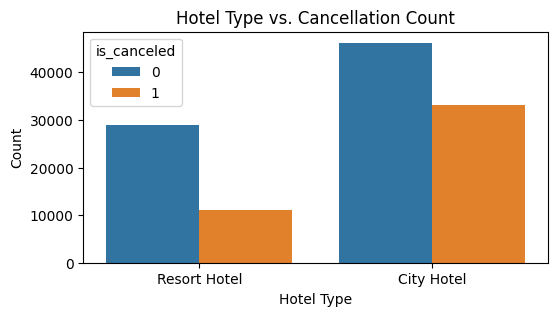

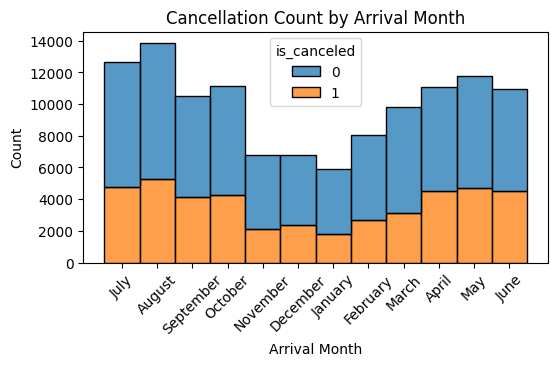

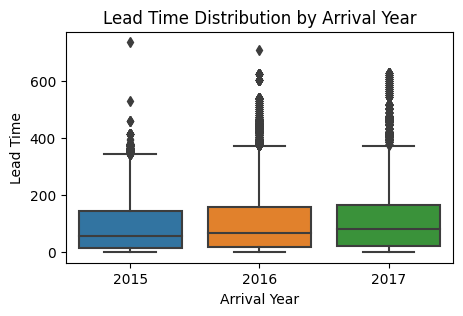

In [72]:
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='hotel', hue='is_canceled')
plt.title('Hotel Type vs. Cancellation Count')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(data=data, x='arrival_date_month', hue='is_canceled', multiple='stack')
plt.title('Cancellation Count by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=data, x='arrival_date_year', y='lead_time')
plt.title('Lead Time Distribution by Arrival Year')
plt.xlabel('Arrival Year')
plt.ylabel('Lead Time')
plt.show()

**Correlation heatmap** (of numerical columns only)

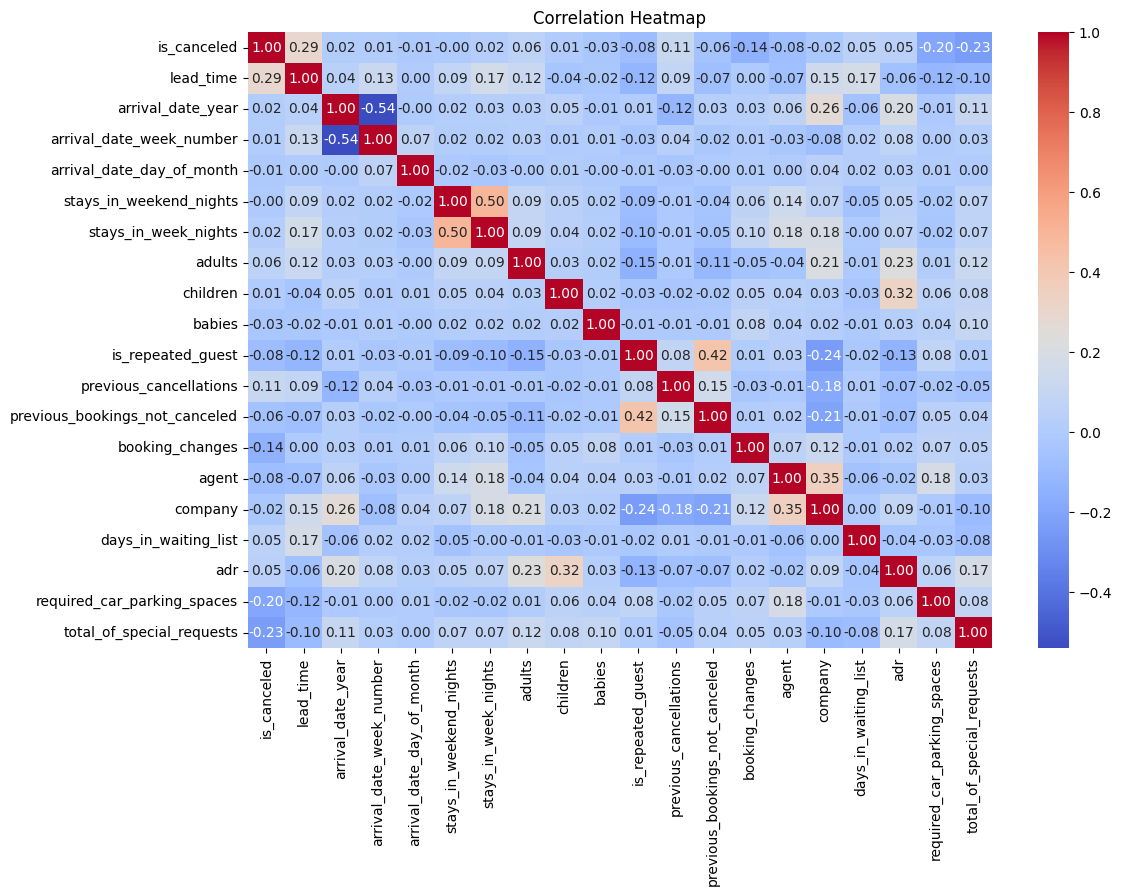

In [63]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Find the least correlated independent variables (numeric variables)

In [64]:
# Calculate correlations between numerical columns and 'is_canceled'
correlations = data.corr()['is_canceled'].abs().sort_values(ascending=True)

# Exclude 'is_canceled' itself and any columns with non-numeric data
non_indicative_columns = correlations.drop(['is_canceled'])

# Display the least indicative columns
print("Least Indicative Columns (Lowest Correlation with 'is_canceled'):")
print(non_indicative_columns)

Least Indicative Columns (Lowest Correlation with 'is_canceled'):
stays_in_weekend_nights           0.001791
children                          0.005048
arrival_date_day_of_month         0.006130
arrival_date_week_number          0.008148
arrival_date_year                 0.016660
company                           0.020642
stays_in_week_nights              0.024765
babies                            0.032491
adr                               0.047557
days_in_waiting_list              0.054186
previous_bookings_not_canceled    0.057358
adults                            0.060017
agent                             0.083114
is_repeated_guest                 0.084793
previous_cancellations            0.110133
booking_changes                   0.144381
required_car_parking_spaces       0.195498
total_of_special_requests         0.234658
lead_time                         0.293123
Name: is_canceled, dtype: float64


Find the least correlated independent variables (categorical variables)

In [65]:
# List of categorical variables to test
categorical_vars = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

# Create an empty DataFrame to store the chi-square test results
chi_square_results = pd.DataFrame(columns=['Variable', 'Chi-Square', 'P-Value'])

# Perform chi-square test for each categorical variable
for var in categorical_vars:
    contingency_table = pd.crosstab(data['is_canceled'], data[var])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_results = chi_square_results.append({'Variable': var, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)

# Sort the chi-square test results by p-value in ascending order
chi_square_results_sorted = chi_square_results.sort_values(by='P-Value')

# Display the sorted results
print(chi_square_results_sorted)

                Variable     Chi-Square        P-Value
0                  hotel    2224.924904   0.000000e+00
3                country   15434.681533   0.000000e+00
4         market_segment    8497.224090   0.000000e+00
5   distribution_channel    3745.794124   0.000000e+00
8     assigned_room_type    4918.693385   0.000000e+00
9           deposit_type   27677.329241   0.000000e+00
10         customer_type    2222.504160   0.000000e+00
11    reservation_status  119390.000000   0.000000e+00
6      is_repeated_guest     857.406318  1.784125e-188
7     reserved_room_type     647.835097  1.121956e-133
1     arrival_date_month     588.691754  3.671823e-119
2                   meal     304.236177   1.321235e-64


#Prepare the Dataset
****

**Apply one-hot encoding to categorical variables**

In [66]:
dataset = pd.get_dummies(data, columns=['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'])

**Label Encoding**

In [67]:
label_encoder = LabelEncoder()
dataset['arrival_date_month'] = label_encoder.fit_transform(dataset['arrival_date_month'])
dataset['is_repeated_guest'] = label_encoder.fit_transform(dataset['is_repeated_guest'])

**Binary Encoding**

In [69]:
#dataset['reservation_status'] = dataset['reservation_status'].map({'Check-Out': 0, 'Canceled': 1})

**Fill missing values in the columns "agent" and "company" with the default value: 0**

In [70]:
dataset['agent'].fillna(0, inplace=True)
dataset['company'].fillna(0, inplace=True)

In [71]:
dataset.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,5,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,0,1,0
1,0,737,2015,5,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,0,1,0
2,0,7,2015,5,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,0,1,0
3,0,13,2015,5,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,0,1,0
4,0,14,2015,5,27,1,0,2,2,0.0,...,1,0,0,0,0,1,0,0,1,0


#Create the models
****